In [1]:
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt

In [2]:
map1 = gpd.read_file('inputs/zona_carabayllo.geojson')

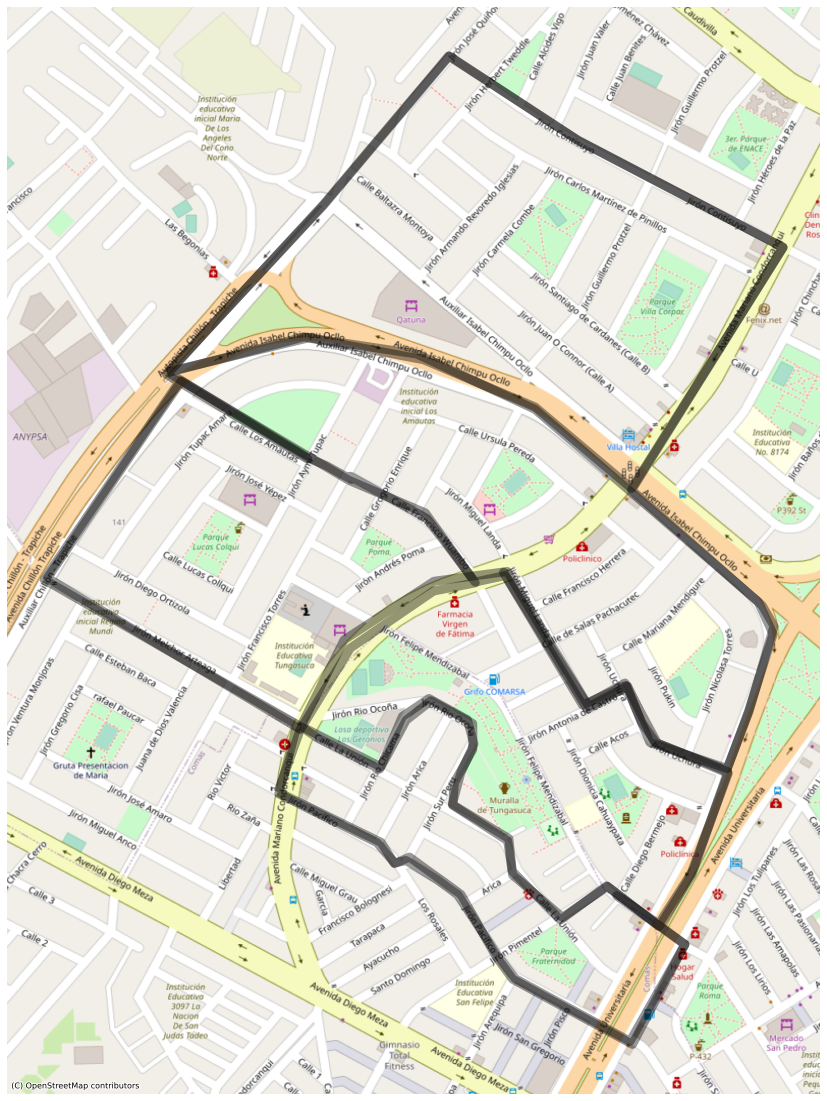

In [4]:
ax = map1.plot(facecolor='none', linewidth=9, alpha=0.4, figsize=(20,20))
ax.set_axis_off()

cx.add_basemap(ax, crs=map1.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

plt.savefig('zonas_carabayllo.png', dpi=300, bbox_inches='tight')

In [5]:
map2 = gpd.read_file('inputs/zona_pachacamac.geojson')

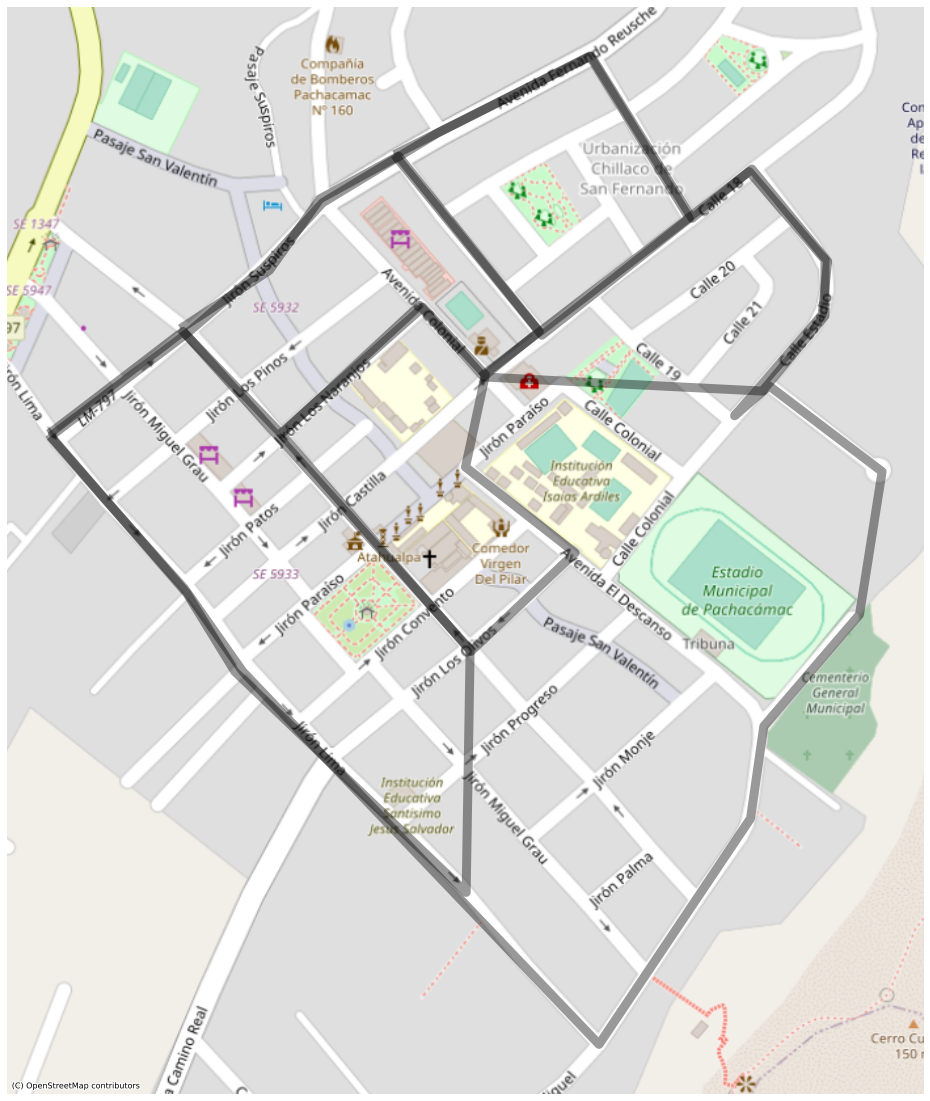

In [7]:
ax = map2.plot(facecolor='none', linewidth=9, alpha=0.4, figsize=(20,20))
ax.set_axis_off()

cx.add_basemap(ax, crs=map2.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

plt.savefig('zonas_pachacamac.png', dpi=300, bbox_inches='tight')

## Get population

In [8]:
import urbanpy as up

In [9]:
manzanas_lima = gpd.read_file('/Users/claudio/Documents/prep-covid-19/inputs/Manzanas/')

In [10]:
carabayllo_hexs = up.geom.gen_hexagons(resolution=11, city=map1)
carabayllo_hexs_pop = up.geom.overlay_polygons_hexs(manzanas_lima, carabayllo_hexs, 'hex', ['POB16', 'VIV'])

/Users/claudio/Documents/proyecto-foodhub-lima/.env/lib/python3.9/site-packages/urbanpy/geom/geom.py:285: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygons_['poly_area'] = polygons_.geometry.area # Calc polygon area
/Users/claudio/Documents/proyecto-foodhub-lima/.env/lib/python3.9/site-packages/urbanpy/geom/geom.py:291: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  area_prop = overlayed.geometry.area / overlayed['poly_area']


In [11]:
from shapely.validation import make_valid

In [12]:
map1.geometry = map1.geometry.apply(make_valid)

In [13]:
carabayllo_clipped_manzanas = gpd.clip(manzanas_lima, map1)

<AxesSubplot:>

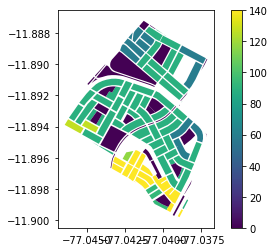

In [14]:
carabayllo_clipped_manzanas.plot('POB16', legend=True)

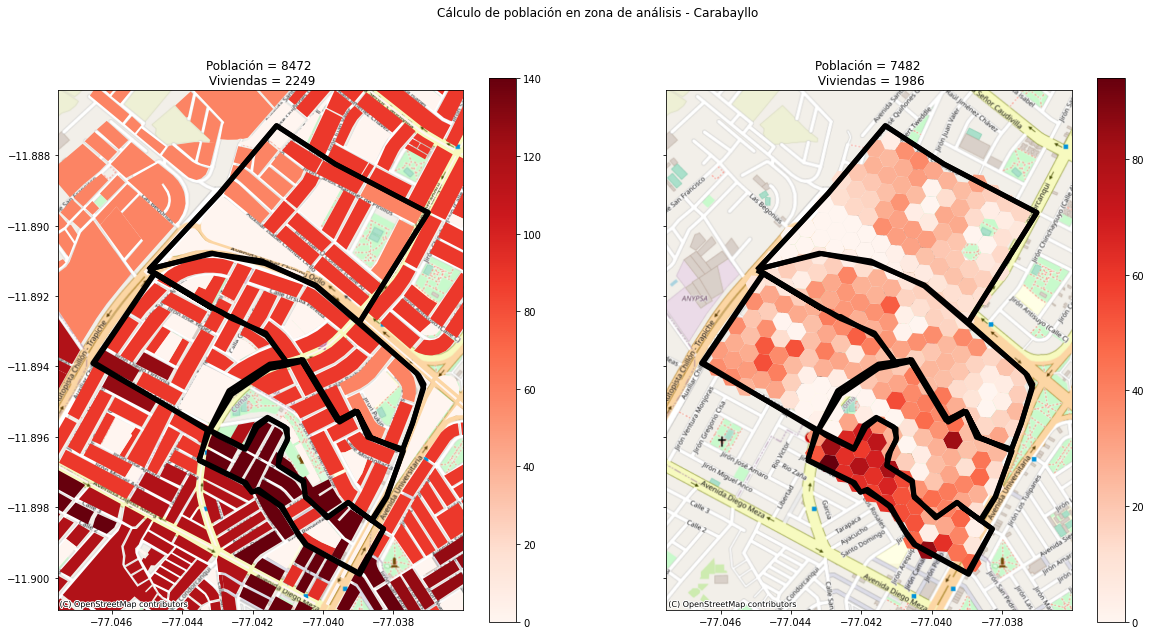

In [15]:
## Final figure
pad = 0.001
minx, miny, maxx, maxy = map1.total_bounds

fig, axes = plt.subplots(1, 2, figsize=(20,10), sharex=True, sharey=True)

fig.suptitle('Cálculo de población en zona de análisis - Carabayllo')

axes[0].set_title(f"Población = {carabayllo_clipped_manzanas['POB16'].sum()} \n Viviendas = {carabayllo_clipped_manzanas['VIV'].sum()}")
manzanas_lima.plot('POB16', legend=True, cmap='Reds', vmin=0, vmax=140, ax=axes[0])
map1.plot(facecolor='none', linewidth=5, ax=axes[0])
axes[0].set_xlim(minx-pad, maxx+pad)
axes[0].set_ylim(miny-pad, maxy+pad)
cx.add_basemap(axes[0], crs=map1.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

axes[1].set_title(f"Población = {carabayllo_hexs_pop['POB16'].sum().astype(int)} \n Viviendas = {carabayllo_hexs_pop['VIV'].sum().astype(int)}")
carabayllo_hexs_pop.plot('POB16', legend=True, cmap='Reds', ax=axes[1])
map1.plot(facecolor='none', linewidth=5, ax=axes[1])

cx.add_basemap(axes[1], crs=map1.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

plt.savefig('poblacion_zona_carabayllo.png', dpi=300, bbox_inches='tight')

In [16]:
pachamac_hexs = up.geom.gen_hexagons(resolution=11, city=map2)
pachamac_hexs_pop = up.geom.overlay_polygons_hexs(manzanas_lima, pachamac_hexs, 'hex', ['POB16', 'VIV'])

/Users/claudio/Documents/proyecto-foodhub-lima/.env/lib/python3.9/site-packages/urbanpy/geom/geom.py:285: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygons_['poly_area'] = polygons_.geometry.area # Calc polygon area
/Users/claudio/Documents/proyecto-foodhub-lima/.env/lib/python3.9/site-packages/urbanpy/geom/geom.py:291: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  area_prop = overlayed.geometry.area / overlayed['poly_area']


In [17]:
pachacamac_clipped_manzanas = gpd.clip(manzanas_lima, map2)

<AxesSubplot:>

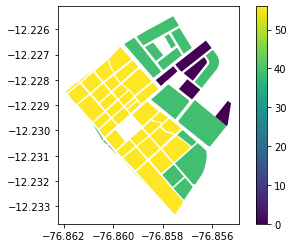

In [18]:
pachacamac_clipped_manzanas.plot('POB16', legend=True)

In [19]:
pachacamac_clipped_manzanas.max()

/var/folders/kb/8rst2bm96jq7g3ykfrtw15zc0000gp/T/ipykernel_2925/303852545.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pachacamac_clipped_manzanas.max()


IDMANZANA     15012300300032
CLASIFICAC                 5
UBIGEO                150123
POB07                     56
VIV07                     16
POB16                     56
VIV                       15
LONGITUDE         -76.855373
LATITUDE           -12.22588
dtype: object

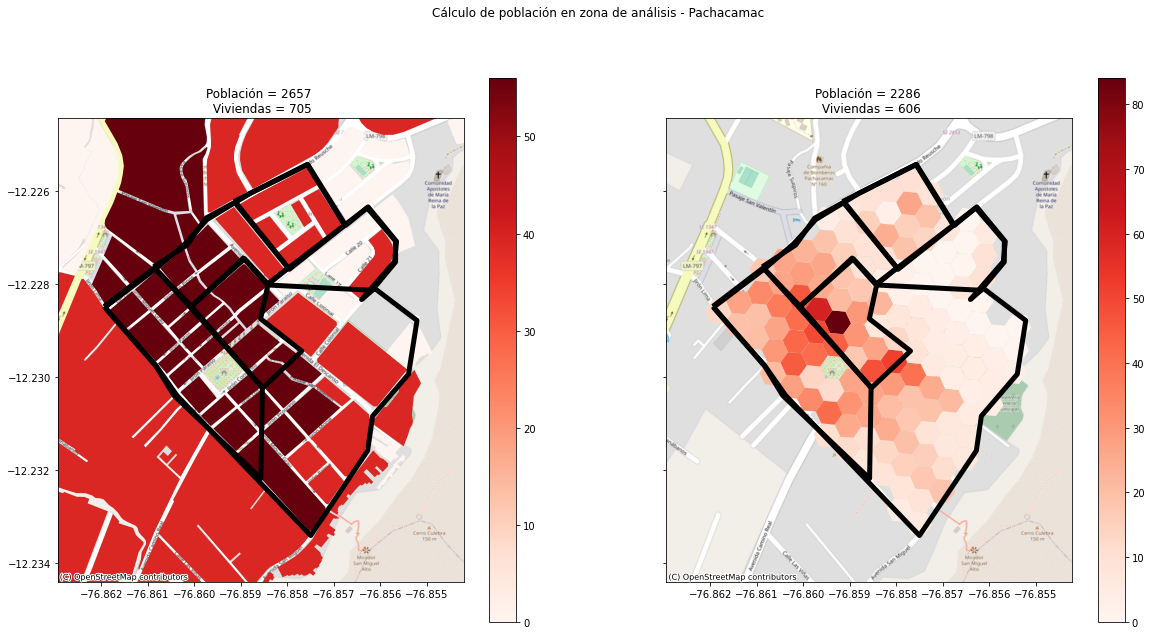

In [20]:
## Final figure
pad = 0.001
minx, miny, maxx, maxy = map2.total_bounds

fig, axes = plt.subplots(1, 2, figsize=(20,10), sharex=True, sharey=True)

fig.suptitle('Cálculo de población en zona de análisis - Pachacamac')

axes[0].set_title(f"Población = {pachacamac_clipped_manzanas['POB16'].sum()} \n Viviendas = {pachacamac_clipped_manzanas['VIV'].sum()}")
manzanas_lima.plot('POB16', legend=True, cmap='Reds', vmin=0, vmax=56, ax=axes[0])
map2.plot(facecolor='none', linewidth=5, ax=axes[0])
axes[0].set_xlim(minx-pad, maxx+pad)
axes[0].set_ylim(miny-pad, maxy+pad)
cx.add_basemap(axes[0], crs=map1.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

axes[1].set_title(f"Población = {pachamac_hexs_pop['POB16'].sum().astype(int)} \n Viviendas = {pachamac_hexs_pop['VIV'].sum().astype(int)}")
pachamac_hexs_pop.plot('POB16', legend=True, cmap='Reds', ax=axes[1])
map2.plot(facecolor='none', linewidth=5, ax=axes[1])

cx.add_basemap(axes[1], crs=map1.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

plt.savefig('poblacion_zona_pachamac.png', dpi=300, bbox_inches='tight')

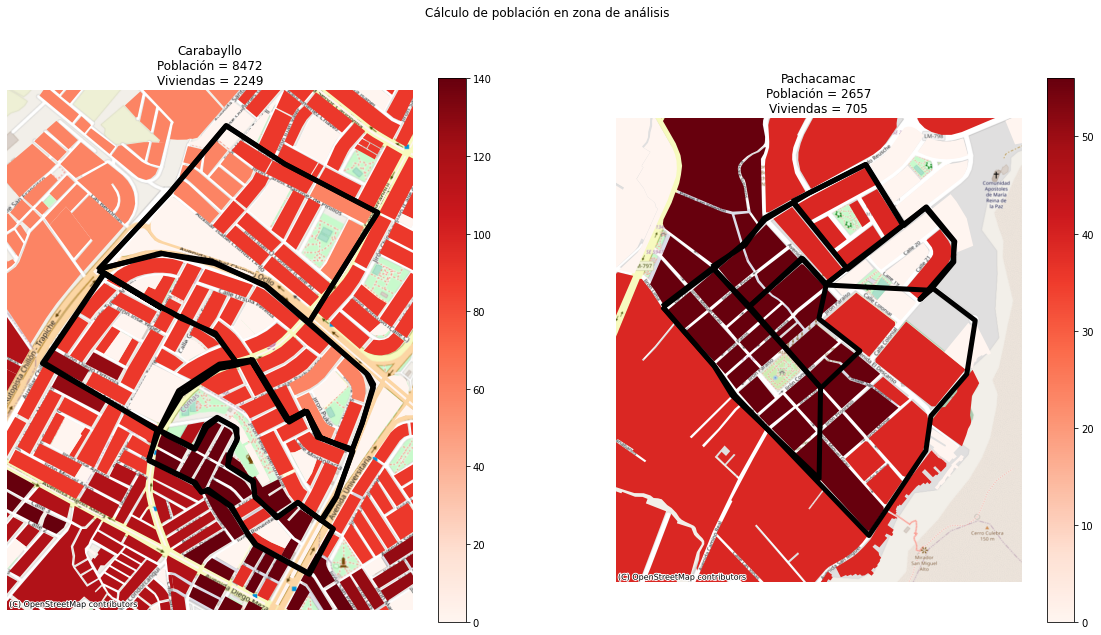

In [21]:
## Final figure
pad = 0.001

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

fig.suptitle('Cálculo de población en zona de análisis')

# Carabayllo
axes[0].set_title(f"Carabayllo\nPoblación = {carabayllo_clipped_manzanas['POB16'].sum()}\nViviendas = {carabayllo_clipped_manzanas['VIV'].sum()}")
manzanas_lima.plot('POB16', legend=True, cmap='Reds', vmin=0, vmax=140, ax=axes[0])
map1.plot(facecolor='none', linewidth=5, ax=axes[0])
minx, miny, maxx, maxy = map1.total_bounds
axes[0].set_xlim(minx-pad, maxx+pad)
axes[0].set_ylim(miny-pad, maxy+pad)
axes[0].set_axis_off()
cx.add_basemap(axes[0], crs=map1.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

# Pachacamac
axes[1].set_title(f"Pachacamac\nPoblación = {pachacamac_clipped_manzanas['POB16'].sum()}\nViviendas = {pachacamac_clipped_manzanas['VIV'].sum()}")
manzanas_lima.plot('POB16', legend=True, cmap='Reds', vmin=0, vmax=56, ax=axes[1])
map2.plot(facecolor='none', linewidth=5, ax=axes[1])
minx, miny, maxx, maxy = map2.total_bounds
axes[1].set_xlim(minx-pad, maxx+pad)
axes[1].set_ylim(miny-pad, maxy+pad)
axes[1].set_axis_off()
cx.add_basemap(axes[1], crs=map2.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

plt.savefig('poblacion_zonas.png', dpi=300, bbox_inches='tight')

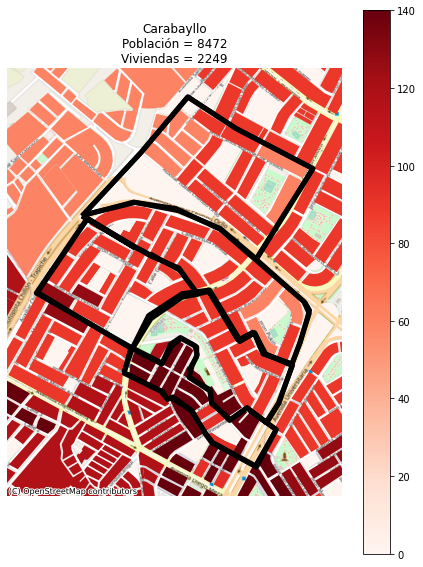

In [22]:
## Final Carabayllo figure
pad = 0.001

ax = manzanas_lima.plot('POB16', legend=True, cmap='Reds', vmin=0, vmax=140, figsize=(7.5, 10))
ax.set_title(f"Carabayllo\nPoblación = {carabayllo_clipped_manzanas['POB16'].sum()}\nViviendas = {carabayllo_clipped_manzanas['VIV'].sum()}")

map1.plot(facecolor='none', linewidth=5, ax=ax)

minx, miny, maxx, maxy = map1.total_bounds
ax.set_xlim(minx-pad, maxx+pad)
ax.set_ylim(miny-pad, maxy+pad)
ax.set_axis_off()

cx.add_basemap(ax, crs=map1.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

plt.savefig('poblacion_zona_carabayllo.png', dpi=300, bbox_inches='tight')

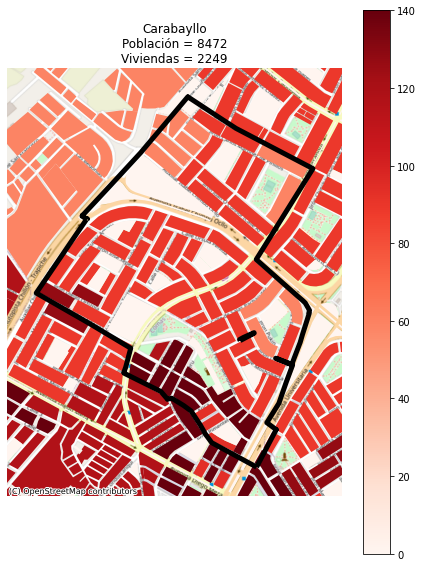

In [23]:
## Final Carabayllo figure
pad = 0.001

ax = manzanas_lima.plot('POB16', legend=True, cmap='Reds', vmin=0, vmax=140, figsize=(7.5, 10))
ax.set_title(f"Carabayllo\nPoblación = {carabayllo_clipped_manzanas['POB16'].sum()}\nViviendas = {carabayllo_clipped_manzanas['VIV'].sum()}")

gpd.GeoSeries(map1.geometry.unary_union).plot(facecolor='none', linewidth=5, ax=ax)

minx, miny, maxx, maxy = map1.total_bounds
ax.set_xlim(minx-pad, maxx+pad)
ax.set_ylim(miny-pad, maxy+pad)
ax.set_axis_off()

cx.add_basemap(ax, crs=map1.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

plt.savefig('poblacion_zona_carabayllo_idrc.png', dpi=300, bbox_inches='tight')

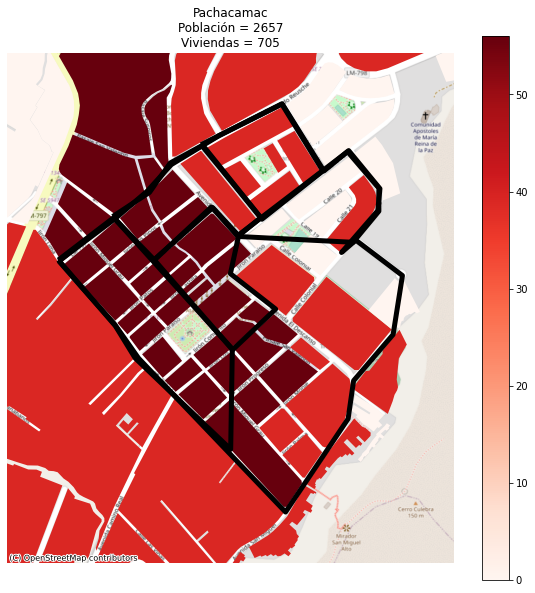

In [24]:
## Final Pachacamac figure
pad = 0.001

ax = manzanas_lima.plot('POB16', legend=True, cmap='Reds', vmin=0, vmax=56, figsize=(10, 10))
ax.set_title(f"Pachacamac\nPoblación = {pachacamac_clipped_manzanas['POB16'].sum()}\nViviendas = {pachacamac_clipped_manzanas['VIV'].sum()}")

map2.plot(facecolor='none', linewidth=5, ax=ax)

minx, miny, maxx, maxy = map2.total_bounds
ax.set_xlim(minx-pad, maxx+pad)
ax.set_ylim(miny-pad, maxy+pad)
ax.set_axis_off()

cx.add_basemap(ax, crs=map2.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

plt.savefig('poblacion_zona_pachacamac.png', dpi=300, bbox_inches='tight')

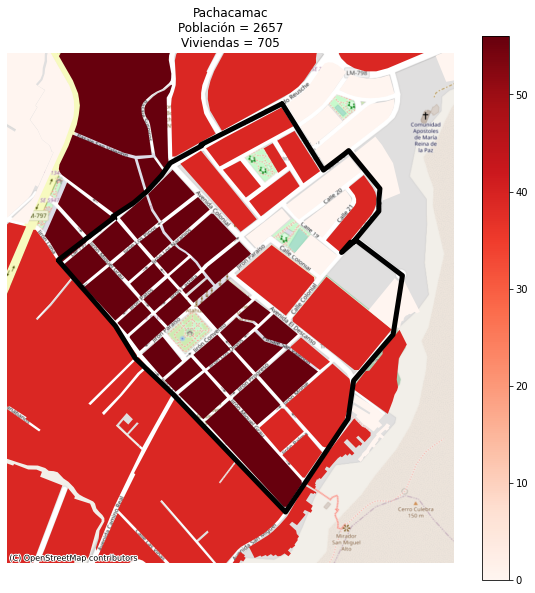

In [25]:
## Final Pachacamac figure
pad = 0.001

ax = manzanas_lima.plot('POB16', legend=True, cmap='Reds', vmin=0, vmax=56, figsize=(10, 10))
ax.set_title(f"Pachacamac\nPoblación = {pachacamac_clipped_manzanas['POB16'].sum()}\nViviendas = {pachacamac_clipped_manzanas['VIV'].sum()}")

gpd.GeoSeries(map2.geometry.unary_union).plot(facecolor='none', linewidth=5, ax=ax)

minx, miny, maxx, maxy = map2.total_bounds
ax.set_xlim(minx-pad, maxx+pad)
ax.set_ylim(miny-pad, maxy+pad)
ax.set_axis_off()

cx.add_basemap(ax, crs=map2.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

plt.savefig('poblacion_zona_pachacamac_idrc.png', dpi=300, bbox_inches='tight')

In [26]:
import pandas as pd

In [27]:
pachacamac_markets = pd.DataFrame.from_dict({
    0: {'name': 'Mercado Municipal', 'lat': -12.22898, 'lon': -76.86035},
    1: {'name': 'Mercado Ocoña', 'lat': -12.22691, 'lon': -76.85909}
}, orient='index')

pachacamac_markets = gpd.GeoDataFrame(
    pachacamac_markets,
    crs='EPSG:4326',
    geometry=gpd.points_from_xy(pachacamac_markets['lon'], pachacamac_markets['lat'])
)

/Users/claudio/Documents/proyecto-foodhub-lima/.env/lib/python3.9/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


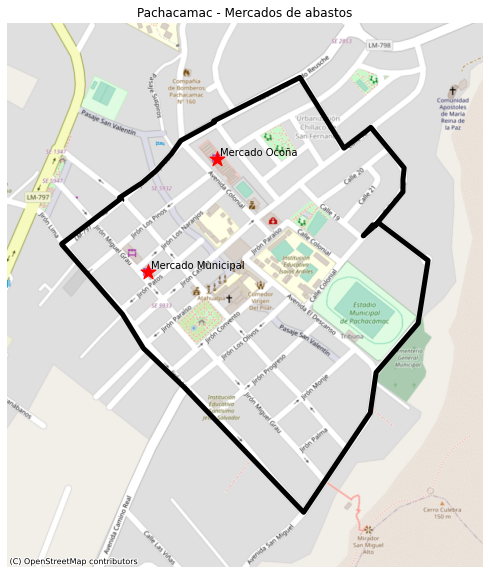

In [28]:
## Final Pachacamac figure
pad = 0.001

ax = pachacamac_markets.plot(color='r', marker='*', markersize=250, figsize=(10, 10))
ax.set_title(f"Pachacamac - Mercados de abastos")

gpd.GeoSeries(map2.geometry.unary_union).plot(facecolor='none', linewidth=5, ax=ax)

minx, miny, maxx, maxy = map2.total_bounds
ax.set_xlim(minx-pad, maxx+pad)
ax.set_ylim(miny-pad, maxy+pad)
ax.set_axis_off()

for x, y, label in zip(pachacamac_markets.geometry.x, pachacamac_markets.geometry.y, pachacamac_markets.name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

cx.add_basemap(ax, crs='EPSG:4326',
               source=cx.providers.OpenStreetMap.Mapnik)

plt.savefig('zona_pachacamac_mercados_idrc.png', dpi=300, bbox_inches='tight')

In [29]:
carabayllo_markets = gpd.GeoDataFrame(
    pd.DataFrame([['Qatuna', -11.89040, -77.04176],
                  ['Mercado Modelo Tungasuca', -11.89292, -77.04387],
                  ['Bioferia Tungasuca', -11.89664, -77.04062],
                  ['Nueva Imagen', -11.89694, -77.03814]],
                 columns=['name', 'lat', 'lon'])
)
carabayllo_markets['geometry'] = gpd.points_from_xy(carabayllo_markets['lon'], carabayllo_markets['lat'])

/Users/claudio/Documents/proyecto-foodhub-lima/.env/lib/python3.9/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


<AxesSubplot:>

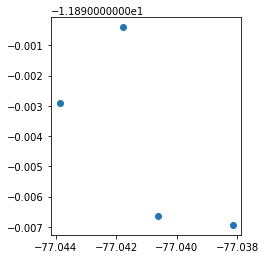

In [30]:
carabayllo_markets.plot()

In [31]:
mcdo_informal = gpd.read_file('inputs/mercado_informal_universitaria_carabayllo.geojson')

/var/folders/kb/8rst2bm96jq7g3ykfrtw15zc0000gp/T/ipykernel_2925/2946058456.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mcdo_informal_point = mcdo_informal.centroid


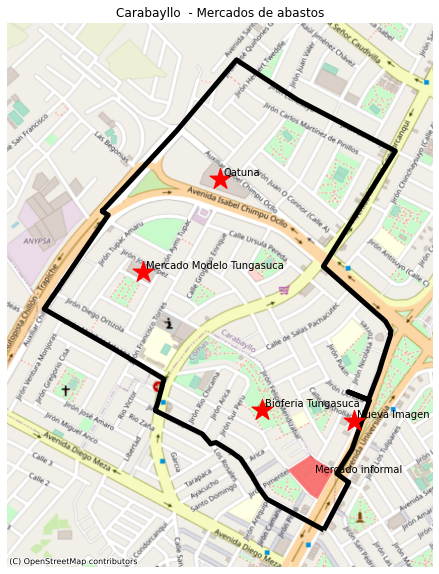

In [32]:
## Final Carabayllo figure
pad = 0.001

ax = gpd.GeoSeries(map1.geometry.unary_union.exterior).plot(edgecolor='k', facecolor='none', linewidth=5, zorder=1, figsize=(10, 10))
ax.set_title(f"Carabayllo  - Mercados de abastos")

carabayllo_markets.plot(color='r', marker='*', markersize=500, zorder=3, ax=ax)

for x, y, label in zip(carabayllo_markets.geometry.x, carabayllo_markets.geometry.y, carabayllo_markets.name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

mcdo_informal.plot(color='r', alpha=0.5, ax=ax)
mcdo_informal_point = mcdo_informal.centroid
ax.annotate('Mercado informal', xy=(mcdo_informal_point.x, mcdo_informal_point.y), xytext=(3, 3), textcoords="offset points")

minx, miny, maxx, maxy = map1.total_bounds
ax.set_xlim(minx-pad, maxx+pad)
ax.set_ylim(miny-pad, maxy+pad)
ax.set_axis_off()

cx.add_basemap(ax, crs=map1.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

plt.savefig('zona_carabayllo_mercados_idrc.png', dpi=300, bbox_inches='tight')

dos cuadras de mendizabalas

parque que esta mendizabal


mandar:
    - graficos de barras de variables binarias
    - Columnas, codigos y numero de respuestas unicas

In [33]:
manzanas_lima.head()

IDMANZANA CODZONA CODMZNA  CLASIFICAC  UBIGEO NOMBREMZNA  \
0    150728    None    None           1  150728       None   
1    150728    None    None           1  150728       None   
2    150728    None    None           1  150728       None   
3    150728    None    None           1  150728       None   
4    150728    None    None           1  150728       None   

                          URBANIZACI NSE07  POB07  VIV07 NSE16  POB16  VIV  \
0                               None  None      0      0  None      0    0   
1  ASOC PUEBLO NUEVO DE BUENOS AIRES  None      0      0  None      0    0   
2  ASOC PUEBLO NUEVO DE BUENOS AIRES  None      0      0  None      0    0   
3  ASOC PUEBLO NUEVO DE BUENOS AIRES  None      0      0  None      0    0   
4  ASOC PUEBLO NUEVO DE BUENOS AIRES  None      0      0  None      0    0   

   LONGITUDE   LATITUDE                                           geometry  
0 -76.671052 -11.916842  POLYGON ((-76.67379 -11.91608, -76.67329 -11.9...  
1 -76.672482 -11.914053  POLYGON ((-76.67319 -11.91445, -76.67318 -11.9...  
2 -76.673467 -11.914446  POLYGON ((-76.67368 -11.91441, -76.67341 -11.9...  
3 -76.673106 -11.914645  POLYGON ((-76.67351 -11.91473, -76.67321 -11.9...  
4 -76.672936 -11.914838  POLYGON ((-76.67335 -11.91492, -76.67267 -11.9...

<AxesSubplot:>

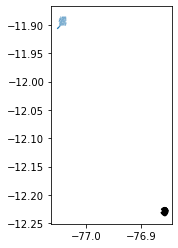

In [35]:
ax = manzanas_lima.cx[minx-pad:maxx+pad, miny-pad:maxy+pad].plot()
map2.plot(facecolor='none', linewidth=5, ax=ax)

In [36]:
ax = lima_metro.plot(figsize=(10,10), edgecolor='k', facecolor='none')
lima_blocks.plot(ax=ax, column='NSE16', cmap='Reds', legend=True, alpha=0.5, 
                 missing_kwds={'color': 'lightgrey',
                               'label': 'No registrado'},
                categories=['Alto', 'Medio Alto', 'Medio',
                               'Medio Bajo', 'Bajo'])
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, crs='EPSG:4326')
ax.set_axis_off()
plt.savefig('outputs/figures/lima-nse_2016.png')

NameError: name 'lima_metro' is not defined

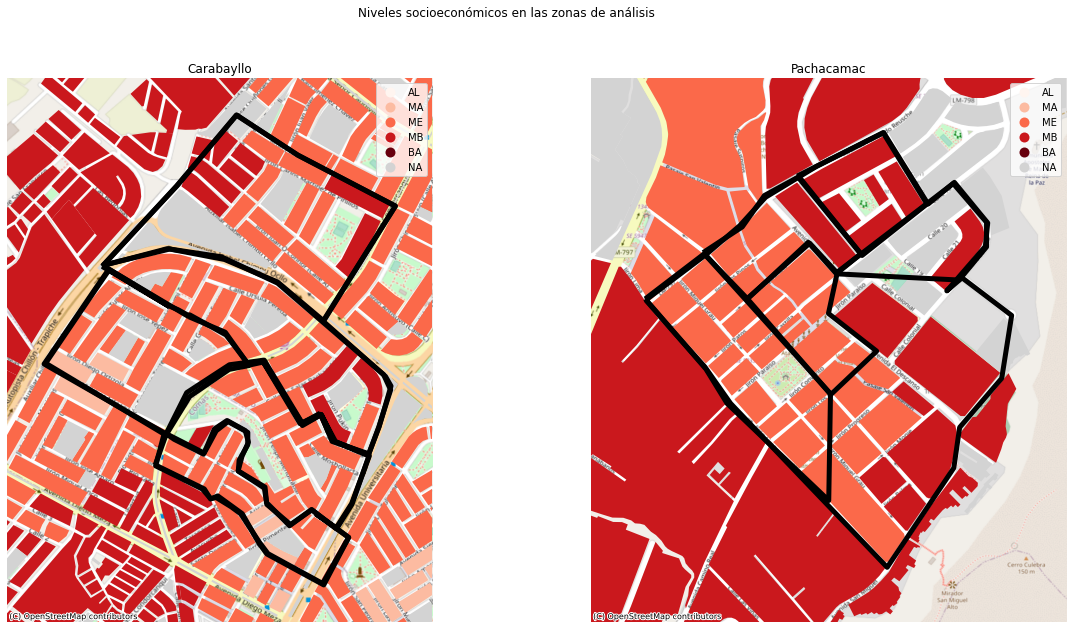

In [37]:
## Final figure NSE
pad = 0.001

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

fig.suptitle('Niveles socioeconómicos en las zonas de análisis')

# Carabayllo
minx, miny, maxx, maxy = map1.total_bounds
axes[0].set_title("Carabayllo")
manzanas_lima.cx[minx-pad:maxx+pad, miny-pad:maxy+pad].plot('NSE16', legend=True, 
    cmap='Reds', ax=axes[0], 
                 missing_kwds={'color': 'lightgrey',
                               'label': 'NA'},
                categories=['AL', 'MA', 'ME',
                               'MB', 'BA'])
map1.plot(facecolor='none', linewidth=5, ax=axes[0])
axes[0].set_xlim(minx-pad, maxx+pad)
axes[0].set_ylim(miny-pad, maxy+pad)
axes[0].set_axis_off()
cx.add_basemap(axes[0], crs=map1.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

# Pachacamac
minx, miny, maxx, maxy = map2.total_bounds
axes[1].set_title("Pachacamac")
manzanas_lima.cx[minx-pad:maxx+pad, miny-pad:maxy+pad].plot('NSE16', legend=True, 
    cmap='Reds', ax=axes[1], 
                  missing_kwds={'color': 'lightgrey',
                               'label': 'NA'},
                categories=['AL', 'MA', 'ME',
                               'MB', 'BA'])
map2.plot(facecolor='none', linewidth=5, ax=axes[1])

axes[1].set_xlim(minx-pad, maxx+pad)
axes[1].set_ylim(miny-pad, maxy+pad)
axes[1].set_axis_off()
cx.add_basemap(axes[1], crs=map2.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

plt.savefig('nse_zonas.png', dpi=300, bbox_inches='tight')

In [39]:
urba_pachacamac = gpd.read_file('/Users/claudio/Desktop/zona_residencial_pachacamac.shp')

<AxesSubplot:>

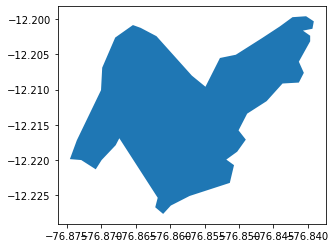

In [40]:
urba_pachacamac.plot()

In [42]:
urba_pachacamac_clipped_mzn = gpd.clip(manzanas_lima, urba_pachacamac)

<AxesSubplot:>

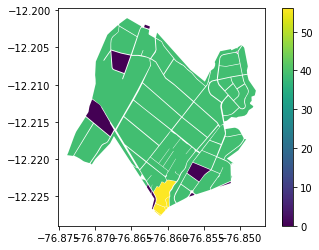

In [46]:
urba_pachacamac_clipped_mzn.plot('POB16', legend=True)

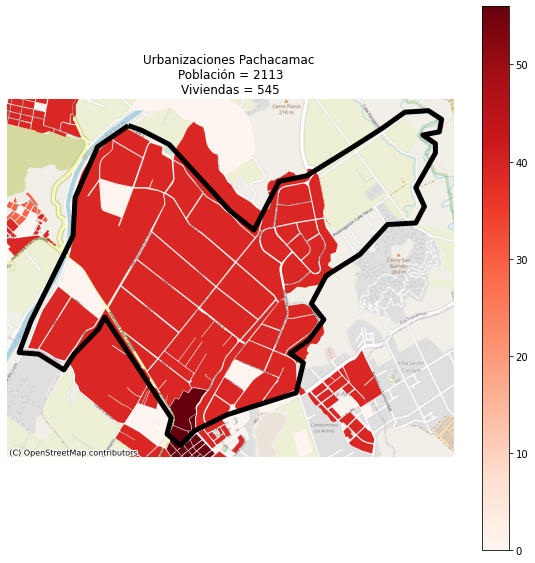

In [45]:
## Pachacamac Urbanizaciones - Poblacion Figure
pad = 0.001

ax = manzanas_lima.plot('POB16', legend=True, cmap='Reds', vmin=0, vmax=56, figsize=(10, 10))
ax.set_title(f"Urbanizaciones Pachacamac \nPoblación = {urba_pachacamac_clipped_mzn['POB16'].sum()}\nViviendas = {urba_pachacamac_clipped_mzn['VIV'].sum()}")

urba_pachacamac.plot(facecolor='none', linewidth=5, ax=ax)

minx, miny, maxx, maxy = urba_pachacamac.total_bounds
ax.set_xlim(minx-pad, maxx+pad)
ax.set_ylim(miny-pad, maxy+pad)
ax.set_axis_off()

cx.add_basemap(ax, crs=urba_pachacamac.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

plt.savefig('poblacion_zona_pachacamac_urbanizacion.png', dpi=300, bbox_inches='tight')

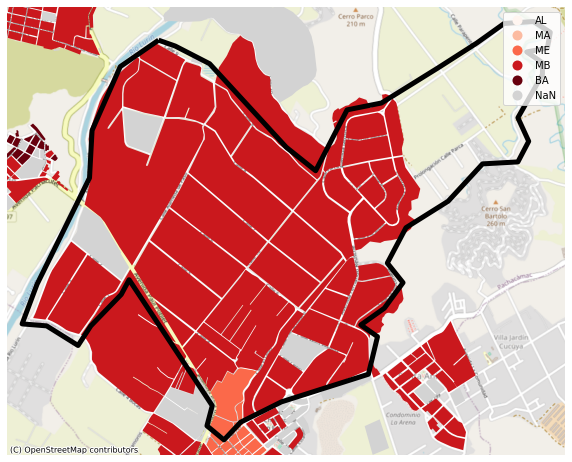

In [48]:
## Pachacamac Urbanizaciones - NSE Figure
ax = manzanas_lima.cx[minx-pad:maxx+pad, miny-pad:maxy+pad].plot('NSE16', legend=True, figsize=(10, 10), 
    cmap='Reds', missing_kwds={'color': 'lightgrey'}, categories=['AL', 'MA', 'ME', 'MB', 'BA'])

urba_pachacamac.plot(facecolor='none', linewidth=5, ax=ax)

ax.set_xlim(minx-pad, maxx+pad)
ax.set_ylim(miny-pad, maxy+pad)
ax.set_axis_off()

cx.add_basemap(ax, crs=urba_pachacamac.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

plt.savefig('nse_zona_pachacamac_urbanizacion.png', dpi=300, bbox_inches='tight')

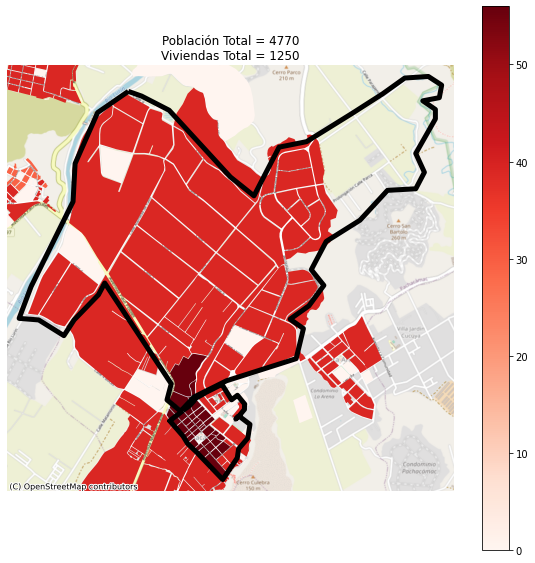

In [56]:
## Pachacamac Urbanizaciones - Poblacion Figure
pad = 0.001

ax = manzanas_lima.plot('POB16', legend=True, cmap='Reds', vmin=0, vmax=56, figsize=(10, 10))

ax.set_title(f"""\nPoblación Total = {urba_pachacamac_clipped_mzn['POB16'].sum()+pachacamac_clipped_manzanas['POB16'].sum()}
Viviendas Total = {urba_pachacamac_clipped_mzn['VIV'].sum()+pachacamac_clipped_manzanas['VIV'].sum()}""")

urba_pachacamac.plot(facecolor='none', linewidth=5, ax=ax)
gpd.GeoSeries(map2.geometry.unary_union.exterior).plot(facecolor='none', color='k', linewidth=5, ax=ax)

minx, miny, maxx, maxy = map2.append(urba_pachacamac).total_bounds
ax.set_xlim(minx-pad, maxx+pad)
ax.set_ylim(miny-pad, maxy+pad)
ax.set_axis_off()

cx.add_basemap(ax, crs=urba_pachacamac.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

plt.savefig('poblacion_zona_pachacamac_con_urbanizacion.png', dpi=300, bbox_inches='tight')

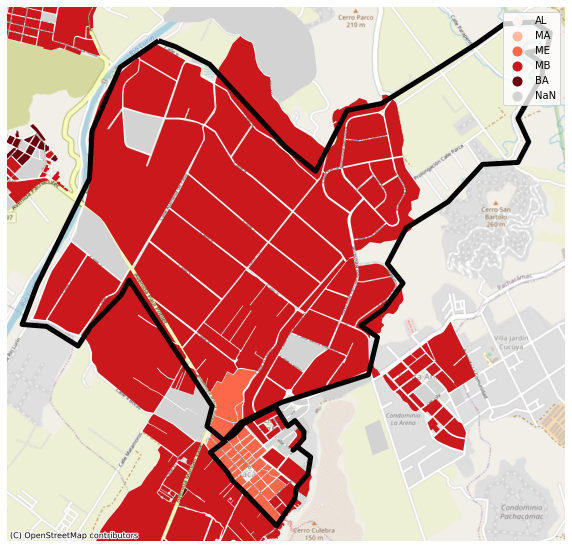

In [57]:
## Pachacamac Urbanizaciones - Poblacion Figure
pad = 0.001

ax = manzanas_lima.cx[minx-pad:maxx+pad, miny-pad:maxy+pad].plot('NSE16', legend=True, figsize=(10, 10), 
    cmap='Reds', missing_kwds={'color': 'lightgrey'}, categories=['AL', 'MA', 'ME', 'MB', 'BA'])

urba_pachacamac.plot(facecolor='none', linewidth=5, ax=ax)
gpd.GeoSeries(map2.geometry.unary_union.exterior).plot(facecolor='none', color='k', linewidth=5, ax=ax)

minx, miny, maxx, maxy = map2.append(urba_pachacamac).total_bounds
ax.set_xlim(minx-pad, maxx+pad)
ax.set_ylim(miny-pad, maxy+pad)
ax.set_axis_off()

cx.add_basemap(ax, crs=urba_pachacamac.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

plt.savefig('nse_zona_pachacamac_con_urbanizacion.png', dpi=300, bbox_inches='tight')